In [1]:
from google.colab import files
uploaded = files.upload()


Saving MLP_with_MNIST_dataset.ipynb to MLP_with_MNIST_dataset.ipynb


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [6]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8619 - loss: 0.8128 - val_accuracy: 0.9585 - val_loss: 0.3387
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9601 - loss: 0.3140 - val_accuracy: 0.9651 - val_loss: 0.2590
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9690 - loss: 0.2402 - val_accuracy: 0.9687 - val_loss: 0.2244
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9716 - loss: 0.2115 - val_accuracy: 0.9663 - val_loss: 0.2195
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9739 - loss: 0.1944 - val_accuracy: 0.9734 - val_loss: 0.1911
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9737 - loss: 0.1886 - val_accuracy: 0.9710 - val_loss: 0.1940
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9786 - loss: 0.1699 - val_accuracy: 0.9682 - val_loss: 0.1923
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9787 - loss: 0.1629 - val_accuracy: 0

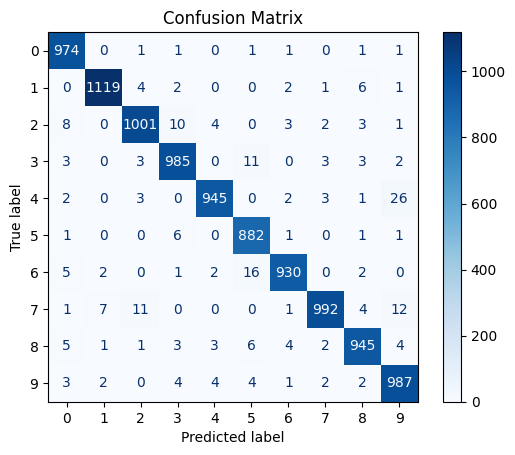

In [7]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile model with optimizer and loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model with increased epochs and batch size tuning
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Predict test labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()